# Информация о пользователях и их логи

Есть два датасета с информацией о пользователях и их логи. 

<b>Задача</b>:
- проанализировать датасеты и объединить их в один
- ответить на аналитические вопросы

<b>Датасет "user_data"</b>:
- client: id клиента
- premium: тип клиента (премиум или обычный)
- age: возраст клиента

<b>Датасет "logs"</b>:
- client: id клиента
- success: успешный или неуспешный заказ
- platform: платформа, с который сделан заказ
- time: время заказа

<b>Аналитические задачи</b>:
1. Посчитать количество уникальных значений платформ, с которых клиенты совершали заказы.
2. Найти клиентов, совершивших больше всего успешных операций.
3. Найти платформу, с которой осуществляется наибольшее количество успешных операций.
4. Найти наиболее популярную платформу среди "премиумных" клиентов.
5. Визуализировать распределение возраста клиентов в зависимости от типа клиента (обычный или премиум).
6. Визуализировать распределение по числу успешных операций для каждого клиента.
7. Найти возраст клиентов, совершивших наибольшее количество успешных действий на платформе "computer".

## Загрузка, изучение и объединение датасетов

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
# устанавливаем размер графиков
sns.set(rc={'figure.figsize':(9,6)})

In [3]:
user_data = pd.read_csv('3_user_data.csv')

In [4]:
logs = pd.read_csv('3_logs.csv')

In [5]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [6]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB


In [7]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [8]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   client    4500 non-null   int64 
 1   success   4500 non-null   bool  
 2   platform  4500 non-null   object
 3   time      4500 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 110.0+ KB


Датасеты загружены, пропусков в данных нет. Есть общий столбец 'client'.

In [9]:
# объединим два датасета в один по id клиента
data = user_data.merge(logs, on='client')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3439 entries, 0 to 3438
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   client    3439 non-null   int64 
 1   premium   3439 non-null   bool  
 2   age       3439 non-null   int64 
 3   success   3439 non-null   bool  
 4   platform  3439 non-null   object
 5   time      3439 non-null   int64 
dtypes: bool(2), int64(3), object(1)
memory usage: 141.1+ KB


In [11]:
data.describe()

,client,age,time
count,3439.000000,3439.000000,3.439000e+03
mean,51605.541436,44.222448,1.585440e+09
std,28340.445974,14.692909,2.320731e+04
min,40.000000,20.000000,1.585400e+09
25%,28154.000000,31.000000,1.585420e+09
50%,52870.000000,44.000000,1.585440e+09
75%,76597.500000,57.000000,1.585460e+09
max,99973.000000,69.000000,1.585480e+09


Датасеты успешно объединены. Минимальный возраст клиента - 20 лет, максимальный - 69 лет.

## Аналитические задачи

1. Посчитать количество уникальных значений платформ, с которых клиенты совершали заказы.

In [12]:
# кол-во уникальных значений платформы
data.platform.nunique()

3

In [13]:
# значения платформы
data.platform.unique()

array(['phone', 'computer', 'tablet'], dtype=object)

2. Какой клиент совершил больше всего успешных операций?

In [14]:
data.groupby('client', as_index=False)\
    .agg({'success': 'sum'})\
    .sort_values(['success', 'client'], ascending=[False, True])\
    .head(15)

,client,success
345,12179,41
813,28719,41
1033,36165,41
1521,52870,41
1791,61468,41
1792,61473,41
2306,78349,41
2416,82563,41
2723,92584,41
1862,64064,40


3. С какой платформы осуществляется наибольшее количество успешных операций?

In [15]:
data.groupby('platform', as_index=False).agg({'success': 'sum'}).sort_values('success', ascending=False)

,platform,success
1,phone,1565
0,computer,843
2,tablet,139


4. Какая платформа наиболее популярна среди "премиумных" клиентов?

In [16]:
data.groupby('platform', as_index=False)\
    .agg({'premium': 'sum'})\
    .sort_values('premium', ascending=False)

,platform,premium
1,phone,246
0,computer,150
2,tablet,24


In [17]:
# кол-во премиум клиентов
data.premium.sum()

420

5. Визуализировать распределение возраста клиентов в зависимости от типа клиента (обычный или премиум).

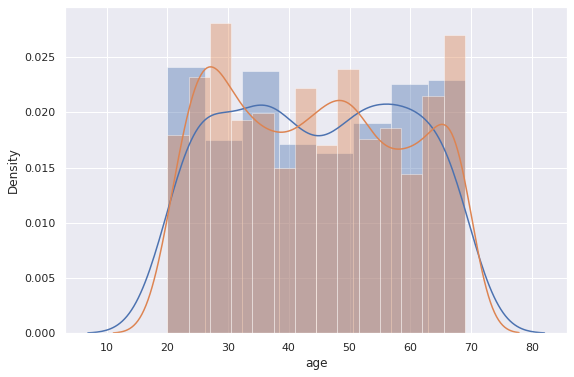

In [18]:
sns.distplot(data.query('premium == True')['age'])
sns.distplot(data.query('premium == False')['age']);

6. Сгруппировать данные по клиентам и визуализировать распределение по числу успешных операций.

In [19]:
suc = data.groupby('client').agg({'success': 'sum'})

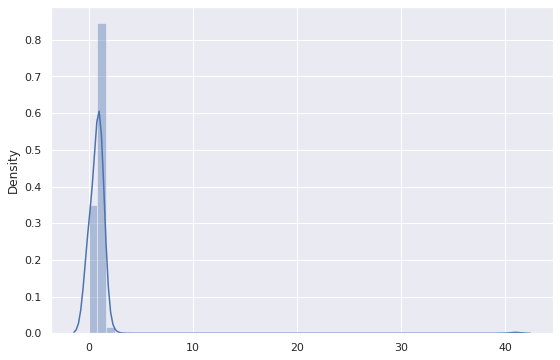

In [20]:
sns.distplot(suc);

Большая часть клиентов совершила менее 4 успешных заказов. Но есть несколько клиентов, совершивших более 40 успешных заказов.

7. Клиенты какого возраста совершили наибольшее количество успешных действий на платформе "computer"?

In [21]:
suc_comp = data.query('platform == "computer" and success == True')

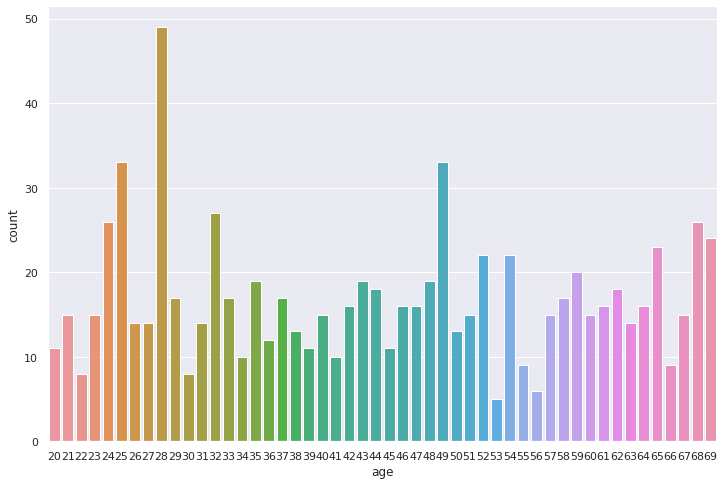

In [22]:
plt.figure(figsize=(12, 8))
sns.countplot(suc_comp['age']);

Больше всего успешных действий на платформе "computer" совершили 28-летние клиенты.

## Выводы

В ходе данного проекта было сделано:
- загружены, изучены и объединены датасеты
- посчитано количество уникальных значений платформ, с которых клиенты совершали заказы
- найдены клиенты, совершившие больше всего успешных операций
- найдена платформа, с которой осуществляется наибольшее количество успешных операций
- найдена наиболее популярная платформа среди "премиумных" клиентов
- визуализировано распределение возраста клиентов в зависимости от типа клиента (обычный или премиум)
- визуализировано распределение по числу успешных операций для каждого клиента
- найден возраст клиентов, совершивших наибольшее количество успешных действий на платформе "computer"